In [1]:
import pandas as pd
import numpy as np

# Creating the dataset
data = [
    ['Technical', 'Senior', 'excellent', 'good', 'urban', 'yes'],
    ['Technical', 'Junior', 'excellent', 'good', 'urban', 'yes'],
    ['Non-Technical', 'Junior', 'average', 'poor', 'rural', 'no'],
    ['Technical', 'Senior', 'average', 'good', 'rural', 'no'],
    ['Technical', 'Senior', 'excellent', 'good', 'rural', 'yes']
]

columns = ['Role', 'Experience', 'Performance', 'InternetQuality', 'WorkLocation', 'Output']

df = pd.DataFrame(data, columns=columns)


X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])


def is_consistent(hypothesis, example):
    return all(h == '?' or h == e for h, e in zip(hypothesis, example))


def more_general(h1, h2):
    return all(h1[i] == '?' or h1[i] == h2[i] for i in range(len(h1)))


def candidate_elimination(X, y):
    n = X.shape[1]

    # Initialize S and G
    S = X[y == 'yes'][0].copy()
    G = [['?' for _ in range(n)]]

    for i in range(len(X)):
        if y[i] == 'yes':
            # Generalize S
            for j in range(n):
                if S[j] != X[i][j]:
                    S[j] = '?'

            # Remove inconsistent hypotheses from G
            G = [g for g in G if is_consistent(g, X[i])]

        else:  # Negative example
            new_G = []
            for g in G:
                if is_consistent(g, X[i]):
                    for j in range(n):
                        if S[j] != '?' and S[j] != X[i][j]:
                            new_h = g.copy()
                            new_h[j] = S[j]
                            if new_h not in new_G:
                                new_G.append(new_h)
                else:
                    new_G.append(g)

            # Keep only maximally general hypotheses
            G = [
                h for h in new_G
                if any(more_general(h, s) for s in [S])
            ]

            # Remove subsumed hypotheses
            G = [
                h for h in G
                if not any(
                    other != h and more_general(other, h)
                    for other in G
                )
            ]

        print(f"\nAfter instance {i+1}:")
        print("S =", S)
        print("G =", G)

    return S, G



final_S, final_G = candidate_elimination(X, y)

print("\nFinal Specific Hypothesis:", final_S)
print("Final General Hypothesis:", final_G)


After instance 1:
S = ['Technical' 'Senior' 'excellent' 'good' 'urban']
G = [['?', '?', '?', '?', '?']]

After instance 2:
S = ['Technical' '?' 'excellent' 'good' 'urban']
G = [['?', '?', '?', '?', '?']]

After instance 3:
S = ['Technical' '?' 'excellent' 'good' 'urban']
G = [['Technical', '?', '?', '?', '?'], ['?', '?', 'excellent', '?', '?'], ['?', '?', '?', 'good', '?'], ['?', '?', '?', '?', 'urban']]

After instance 4:
S = ['Technical' '?' 'excellent' 'good' 'urban']
G = [['?', '?', 'excellent', '?', '?'], ['?', '?', '?', '?', 'urban']]

After instance 5:
S = ['Technical' '?' 'excellent' 'good' '?']
G = [['?', '?', 'excellent', '?', '?']]

Final Specific Hypothesis: ['Technical' '?' 'excellent' 'good' '?']
Final General Hypothesis: [['?', '?', 'excellent', '?', '?']]


In [1]:
# Tuple to store student IDs
student_ids = ('S101', 'S102', 'S103', 'S104')

# Dictionary to store student academic details
students = {
    'S101': {'name': 'Asha', 'assignment': 78, 'test': 80, 'attendance': 92, 'hours': 8},
    'S102': {'name': 'Ravi', 'assignment': 65, 'test': 68, 'attendance': 85, 'hours': 5},
    'S103': {'name': 'Meena', 'assignment': 88, 'test': 90, 'attendance': 96, 'hours': 10},
    'S104': {'name': 'Kiran', 'assignment': 55, 'test': 58, 'attendance': 78, 'hours': 4}
}

# Function to calculate average score
def calculate_average(assignment, test):
    return (assignment + test) / 2

# Function to determine academic risk level
def determine_risk(avg_score, attendance, hours):
    if avg_score < 60 or attendance < 80 or hours < 5:
        return "High Risk"
    elif avg_score < 75:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Create a list to store processed student records
report = []

for sid in student_ids:
    data = students[sid]
    avg = calculate_average(data['assignment'], data['test'])
    risk = determine_risk(avg, data['attendance'], data['hours'])
    
    report.append({
        'id': sid,
        'name': data['name'],
        'average': avg,
        'attendance': data['attendance'],
        'hours': data['hours'],
        'risk': risk
    })

# Sort the report by average score in decreasing order
report.sort(key=lambda x: x['average'], reverse=True)

# Display structured performance report
print("STUDENT PERFORMANCE REPORT (Sorted by Average Score)")
print("-" * 55)

for student in report:
    print(f"Student ID      : {student['id']}")
    print(f"Name            : {student['name']}")
    print(f"Average Score   : {student['average']:.2f}")
    print(f"Attendance (%)  : {student['attendance']}")
    print(f"Study Hours     : {student['hours']} hrs/week")
    print(f"Risk Level      : {student['risk']}")
    print("-" * 55)


STUDENT PERFORMANCE REPORT (Sorted by Average Score)
-------------------------------------------------------
Student ID      : S103
Name            : Meena
Average Score   : 89.00
Attendance (%)  : 96
Study Hours     : 10 hrs/week
Risk Level      : Low Risk
-------------------------------------------------------
Student ID      : S101
Name            : Asha
Average Score   : 79.00
Attendance (%)  : 92
Study Hours     : 8 hrs/week
Risk Level      : Low Risk
-------------------------------------------------------
Student ID      : S102
Name            : Ravi
Average Score   : 66.50
Attendance (%)  : 85
Study Hours     : 5 hrs/week
Risk Level      : Moderate Risk
-------------------------------------------------------
Student ID      : S104
Name            : Kiran
Average Score   : 56.50
Attendance (%)  : 78
Study Hours     : 4 hrs/week
Risk Level      : High Risk
-------------------------------------------------------


In [2]:
import re
from collections import defaultdict

VALID_ACTIVITIES = {"LOGIN", "LOGOUT", "SUBMIT_ASSIGNMENT"}

# Student class
class Student:
    def __init__(self, student_id, name):
        self.student_id = student_id
        self.name = name
        self.activities = []

    def add_activity(self, activity, date, time):
        self.activities.append((activity, date, time))

    def activity_summary(self):
        logins = sum(1 for a in self.activities if a[0] == "LOGIN")
        submissions = sum(1 for a in self.activities if a[0] == "SUBMIT_ASSIGNMENT")
        return logins, submissions


# Generator to read valid log entries
def read_log_file(filename):
    with open(filename, "r") as file:
        for line in file:
            try:
                parts = [p.strip() for p in line.split("|")]
                if len(parts) != 5:
                    raise ValueError("Invalid format")

                sid, name, activity, date, time = parts

                # Validate student ID
                if not re.match(r"S\d+", sid):
                    raise ValueError("Invalid Student ID")

                # Validate activity
                if activity not in VALID_ACTIVITIES:
                    raise ValueError("Invalid Activity")

                yield sid, name, activity, date, time

            except Exception:
                continue  # Ignore invalid entries


# Main processing
students = {}
daily_stats = defaultdict(int)
login_tracker = defaultdict(int)

for sid, name, activity, date, time in read_log_file("activity_log.txt"):
    if sid not in students:
        students[sid] = Student(sid, name)

    students[sid].add_activity(activity, date, time)
    daily_stats[date] += 1

    if activity == "LOGIN":
        login_tracker[sid] += 1
    elif activity == "LOGOUT":
        login_tracker[sid] -= 1


# Generate report
with open("activity_report.txt", "w") as report:
    print("STUDENT ACTIVITY REPORT")
    print("-" * 40)
    report.write("STUDENT ACTIVITY REPORT\n")

    for student in students.values():
        logins, submissions = student.activity_summary()
        line = f"{student.student_id} | Logins: {logins} | Submissions: {submissions}"
        print(line)
        report.write(line + "\n")

    print("\nABNORMAL BEHAVIOR (Multiple logins without logout):")
    report.write("\nABNORMAL BEHAVIOR:\n")
    for sid, count in login_tracker.items():
        if count > 0:
            msg = f"{sid} has {count} unclosed login(s)"
            print(msg)
            report.write(msg + "\n")

    print("\nDAILY ACTIVITY STATISTICS:")
    report.write("\nDAILY ACTIVITY STATISTICS:\n")
    for date, count in daily_stats.items():
        msg = f"{date} : {count} activities"
        print(msg)
        report.write(msg + "\n")


STUDENT ACTIVITY REPORT
----------------------------------------
S101 | Logins: 1 | Submissions: 0
S102 | Logins: 0 | Submissions: 1

ABNORMAL BEHAVIOR (Multiple logins without logout):

DAILY ACTIVITY STATISTICS:
2025-03-10 : 3 activities


In [1]:
# Sentiment Analysis using Naïve Bayes (From Scratch)
# No sklearn, no pretrained models

# Dataset
dataset = [
    ("I love this product", "Positive"),
    ("Very bad experience", "Negative"),
    ("Amazing quality", "Positive"),
    ("Not worth the money", "Negative"),
    ("Excellent performance", "Positive"),
    ("Terrible support", "Negative"),
    ("Happy with purchase", "Positive"),
    ("Waste of time", "Negative"),
    ("Good value", "Positive"),
    ("Disappointed", "Negative")
]

# Separate data by class
positive_docs = []
negative_docs = []

for text, label in dataset:
    if label == "Positive":
        positive_docs.append(text.lower())
    else:
        negative_docs.append(text.lower())

# Count documents
total_docs = len(dataset)
positive_count = len(positive_docs)
negative_count = len(negative_docs)

# Prior probabilities
P_positive = positive_count / total_docs
P_negative = negative_count / total_docs

# Function to calculate word frequencies
def word_frequency(documents):
    freq = {}
    for doc in documents:
        for word in doc.split():
            freq[word] = freq.get(word, 0) + 1
    return freq

# Word frequencies
positive_freq = word_frequency(positive_docs)
negative_freq = word_frequency(negative_docs)

# Vocabulary
vocabulary = set(positive_freq.keys()).union(set(negative_freq.keys()))
vocab_size = len(vocabulary)

# Total words in each class
positive_words = sum(positive_freq.values())
negative_words = sum(negative_freq.values())

# Function to classify new sentence
def classify_sentence(sentence):
    sentence = sentence.lower()
    words = sentence.split()

    positive_prob = P_positive
    negative_prob = P_negative

    for word in words:
        # Laplace smoothing
        positive_word_prob = (positive_freq.get(word, 0) + 1) / (positive_words + vocab_size)
        negative_word_prob = (negative_freq.get(word, 0) + 1) / (negative_words + vocab_size)

        positive_prob *= positive_word_prob
        negative_prob *= negative_word_prob

    if positive_prob > negative_prob:
        return "Positive"
    else:
        return "Negative"

# Test sentence
test_sentence = input("Enter a sentence to classify its sentiment: ")
result = classify_sentence(test_sentence)

print("Test Sentence :", test_sentence)
print("Predicted Sentiment :", result)


Test Sentence : 
Predicted Sentiment : Negative


In [ ]:
# Sentiment Analysis using Hugging Face Pretrained Model

from transformers import pipeline

# Load pretrained sentiment analysis pipeline
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# Dataset (same as Task 1)
texts = [
    "I love this product",
    "Very bad experience",
    "Amazing quality",
    "Not worth the money",
    "Disappointed"
]

# Analyze sentiment
print("Sentiment Analysis Results:\n")
for text in texts:
    result = sentiment_analyzer(text)[0]
    print(f"Text: {text}")
    print(f"Prediction: {result['label']}, Confidence: {result['score']:.2f}\n")


Device set to use cpu


Sentiment Analysis Results:

Text: I love this product
Prediction: POSITIVE, Confidence: 1.00

Text: Very bad experience
Prediction: NEGATIVE, Confidence: 1.00

Text: Amazing quality
Prediction: POSITIVE, Confidence: 1.00

Text: Not worth the money
Prediction: NEGATIVE, Confidence: 1.00

Text: Disappointed
Prediction: NEGATIVE, Confidence: 1.00



: 

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression

# -------------------------------------------------
# STEP 1: TRAINING DATA (KNOWN SEMESTER MARKS)
# -------------------------------------------------
# UT max = 60, AS max = 40, Semester max = 100
data = {
    "S1": {"ut1": 55, "ut2": 55, "as1": 38, "as2": 39, "sem": 82},
    "S2": {"ut1": 43, "ut2": 52, "as1": 35, "as2": 30, "sem": 70},
    "S3": {"ut1": 37, "ut2": 39, "as1": 34, "as2": 33, "sem": 56},
    "S4": {"ut1": 22, "ut2": 18, "as1": 30, "as2": 35, "sem": 45},
    "S5": {"ut1": 40, "ut2": 32, "as1": 35, "as2": 27, "sem": 60}
}

X = []
semester_marks = []
pass_fail = []

for s in data.values():
    X.append([s["ut1"], s["ut2"], s["as1"], s["as2"]])
    semester_marks.append(s["sem"])

    # Internal (40)
    internal = (s["ut1"] + s["ut2"] + s["as1"] + s["as2"]) / 5
    # Semester converted to 60
    semester_60 = (s["sem"] / 100) * 60
    final = internal + semester_60

    pass_fail.append(1 if final >= 50 else 0)

X = np.array(X)
semester_marks = np.array(semester_marks)
pass_fail = np.array(pass_fail)

# -------------------------------------------------
# STEP 2: STANDARDIZATION
# -------------------------------------------------
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# -------------------------------------------------
# STEP 3: PCA
# -------------------------------------------------
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# -------------------------------------------------
# STEP 4: TRAIN MODELS
# -------------------------------------------------
# Semester mark predictor (out of 100)
sem_reg = LinearRegression()
sem_reg.fit(X_pca, semester_marks)

# Pass/Fail classifier
clf = LogisticRegression()
clf.fit(X_pca, pass_fail)

# -------------------------------------------------
# STEP 5: USER INPUT (NO SEMESTER MARK)
# -------------------------------------------------
print("\nEnter Student Marks (UT max 60, AS max 40)")
ut1 = float(input("UT1: "))
ut2 = float(input("UT2: "))
as1 = float(input("AS1: "))
as2 = float(input("AS2: "))

user_X = np.array([[ut1, ut2, as1, as2]])
user_std = scaler.transform(user_X)
user_pca = pca.transform(user_std)

# -------------------------------------------------
# STEP 6: PREDICTION
# -------------------------------------------------
predicted_semester = sem_reg.predict(user_pca)[0]

# Internal calculation (40)
internal_user = (ut1 + ut2 + as1 + as2) / 5

# Semester converted to 60
semester_60_user = (predicted_semester / 100) * 60

# Final marks (100)
final_user = internal_user + semester_60_user

# Result
result = "PASS ✅" if final_user >= 50 else "FAIL ❌"

# -------------------------------------------------
# STEP 7: SEMESTER MARK RANGE
# -------------------------------------------------
def sem_range(mark):
    if mark < 35:
        return "0 – 35"
    elif mark < 50:
        return "35 – 50"
    elif mark < 75:
        return "50 – 75"
    elif mark < 90:
        return "75 – 90"
    else:
        return "90 – 100"

# -------------------------------------------------
# STEP 8: OUTPUT (EXACT FORMAT)
# -------------------------------------------------
predicted_sem_round = round(predicted_semester)
internal_round = round(internal_user)
semester_60_round = round(semester_60_user)
final_round = round(final_user)

print("\n--- PCA PREDICTION RESULT ---")
print(f"Predicted Semester Marks ~ {predicted_sem_round}")
print(f"Predicted Semester Mark Range: {sem_range(predicted_sem_round)}")
print(
    f"Final Marks :  "
    f"{internal_round} + "
    f"{semester_60_round} = "
    f"{final_round}"
)
print("Result:", result)


Predicted Student Result: PASS


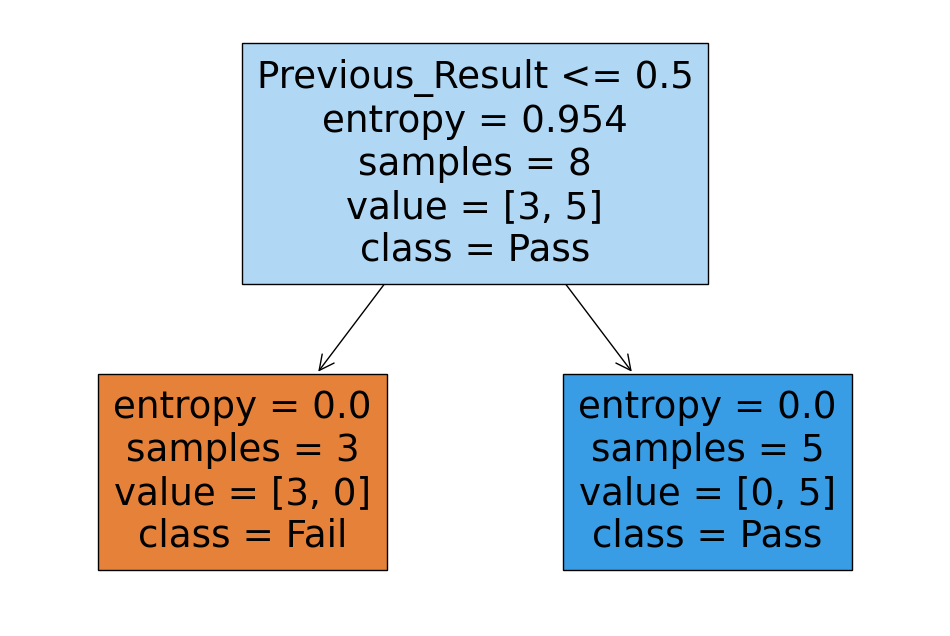

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# ----------------------------------
# STEP 1: DATASET
# ----------------------------------
data = {
    'Study_Hours': ['High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Low'],
    'Attendance': ['Good', 'Average', 'Poor', 'Good', 'Poor', 'Average', 'Good', 'Poor'],
    'Previous_Result': ['Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail'],
    'Extra_Classes': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Result': ['Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail']
}

df = pd.DataFrame(data)

# ----------------------------------
# STEP 2: LABEL ENCODING
# ----------------------------------
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# ----------------------------------
# STEP 3: FEATURE & TARGET SPLIT
# ----------------------------------
X = df.drop('Result', axis=1)
y = df['Result']

# ----------------------------------
# STEP 4: DECISION TREE MODEL
# ----------------------------------
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# ----------------------------------
# STEP 5: PREDICTION
# ----------------------------------
# Sample: High Study, Good Attendance, Pass, Yes
new_sample = pd.DataFrame([[2, 2, 1, 1]], columns=X.columns)
prediction = model.predict(new_sample)

print("Predicted Student Result:", "PASS" if prediction[0] == 1 else "FAIL")

# ----------------------------------
# STEP 6: TREE VISUALIZATION
# ----------------------------------
plt.figure(figsize=(12, 8))
tree.plot_tree(
    model,
    feature_names=list(X.columns),
    class_names=['Fail', 'Pass'],
    filled=True
)
plt.show()
